## General Information

In this notebook, we are going to predict win rate using Decison Tree

#### To simplify you navigation through this kernel:
    
    *Change to your own path in order to read the csv file*
    
    Main data exploration:
        1: Evaulation of 'Synergy' Feature Alone
        2: Changing parameters
        3: Evaulation of 'Counter' Feature Alone
        4: Evaluation of both "Synergy" & "Counter" Feature 
            -Classification Accuracy
            -Feacture Importances
            -F-Measure
            -Logarithmic Loss
            -Area under curve (AUC)
           

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

    ## Change to your path

In [30]:
import os
import pandas as pd
os.chdir(r"C:\Users\chena\Desktop\dota-2-matches\code\all_csv_files")

In [31]:
matches = pd.read_csv('match.csv')
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
classes = ['Dire Win', 'Radiant Win']
hero_selection = pd.read_csv('mapped_match_hero.csv')
df_between_hero_synergy = pd.read_csv("df_between_hero_synergy.csv")

In [32]:
X = hero_selection.merge(df_between_hero_synergy.df_between_hero_synergy, left_index=True, right_index=True)
X.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,df_between_hero_synergy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.071145
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.856811
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.425840
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.501305
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,-0.172906


### Evaulation of 'Synergy' Feature Alone

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1=pd.DataFrame(scaler.transform(X),columns=X.columns)
X1.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,df_between_hero_synergy
0,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.119532
1,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,4.524206,-1.558533
2,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-0.779188
3,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,5.137826,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-0.915655
4,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,1.932924,-0.287529,-0.28145,-0.290373,4.524206,-0.321797


In [34]:
from sklearn import model_selection
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=seed)

C:\Users\chena\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [35]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_leaf_nodes = 5, max_depth = 5)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X1, y, cv=kfold, scoring=scoring)
print('Accuracy -validation set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy -validation set: 64.34% (0.01)


In [36]:
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.25, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 64.52%


In [37]:
predictions = model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)

Precision: 0.642151
Recall: 0.719225
F1 score: 0.678507


# Changing parameters

In [27]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.25, random_state=seed)

def model_eval(model, X1, X_train, X_test, y_train, y_test):
    results = model_selection.cross_val_score(model, X1, y, cv=kfold, scoring='accuracy')
    print('Accuracy -validation set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))
    
    model.fit(X_train, y_train)
    result = model.score(X_test, y_test)
    print("Accuracy - test set: %.2f%%" % (result*100.0))
    
    predictions = model.predict(X_test)
    precision = precision_score(y_test, predictions)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, predictions)
    print('Recall: %f' % recall)
    # f1: tp / (tp + fp + fn)
    f1 = f1_score(y_test, predictions)
    print('F1 score: %f' % f1)
#     return result

for i in range (2,11):
    print (f'Results when max number of leaf nodes = {i} and max depth = {i}')
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_leaf_nodes = i, max_depth = i)
    model_eval(model, X1, X_train, X_test, y_train, y_test)
    print ()

Results when max number of leaf nodes = 2 and max depth = 2
Accuracy -validation set: 63.96% (0.01)
Accuracy - test set: 64.52%
Precision: 0.642151
Recall: 0.719225
F1 score: 0.678507

Results when max number of leaf nodes = 3 and max depth = 3
Accuracy -validation set: 63.96% (0.01)
Accuracy - test set: 64.52%
Precision: 0.642151
Recall: 0.719225
F1 score: 0.678507

Results when max number of leaf nodes = 4 and max depth = 4
Accuracy -validation set: 63.96% (0.01)
Accuracy - test set: 64.52%
Precision: 0.642151
Recall: 0.719225
F1 score: 0.678507

Results when max number of leaf nodes = 5 and max depth = 5
Accuracy -validation set: 64.34% (0.01)
Accuracy - test set: 64.52%
Precision: 0.642151
Recall: 0.719225
F1 score: 0.678507

Results when max number of leaf nodes = 6 and max depth = 6
Accuracy -validation set: 64.34% (0.01)
Accuracy - test set: 64.52%
Precision: 0.642151
Recall: 0.719225
F1 score: 0.678507

Results when max number of leaf nodes = 7 and max depth = 7
Accuracy -valid

AUC - Test Set: 69.38%


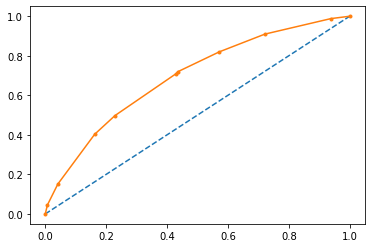

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


### Evaulation of 'Counter' Feature Alone

In [40]:
df_between_counter_rate = pd.read_csv("df_between_counter_rate1.csv")
X = hero_selection.merge(df_between_counter_rate['diff_counter'], left_index=True, right_index=True)
X.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.033715
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.002285
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.049158
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.005308
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.031996


In [41]:
scaler = StandardScaler()
scaler.fit(X)
X1=pd.DataFrame(scaler.transform(X),columns=X.columns)
X1.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter
0,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.893963
1,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,4.524206,-0.062968
2,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-1.308931
3,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,5.137826,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.138878
4,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.194635,-0.103506,-0.139616,-0.163512,1.932924,-0.287529,-0.28145,-0.290373,4.524206,0.848292


In [42]:
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=seed)

C:\Users\chena\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.25, random_state=seed)
for i in range (221,229):
    print (f'Results when max number of leaf nodes = {i} and max depth = {i}')
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_leaf_nodes = i, max_depth = i)
    model_eval(model, X1, X_train, X_test, y_train, y_test)
    print ()

Results when max number of leaf nodes = 221 and max depth = 221
Accuracy -validation set: 72.09% (0.01)
Accuracy - test set: 72.86%
Precision: 0.718128
Recall: 0.787767
F1 score: 0.751337

Results when max number of leaf nodes = 222 and max depth = 222
Accuracy -validation set: 72.09% (0.01)
Accuracy - test set: 72.82%
Precision: 0.718031
Recall: 0.786999
F1 score: 0.750935

Results when max number of leaf nodes = 223 and max depth = 223
Accuracy -validation set: 72.14% (0.00)
Accuracy - test set: 72.86%
Precision: 0.718496
Recall: 0.786845
F1 score: 0.751119

Results when max number of leaf nodes = 224 and max depth = 224
Accuracy -validation set: 72.14% (0.00)
Accuracy - test set: 72.86%
Precision: 0.718680
Recall: 0.786384
F1 score: 0.751009

Results when max number of leaf nodes = 225 and max depth = 225
Accuracy -validation set: 72.15% (0.00)
Accuracy - test set: 72.90%
Precision: 0.719246
Recall: 0.786230
F1 score: 0.751248

Results when max number of leaf nodes = 226 and max dep

AUC - Test Set: 80.98%


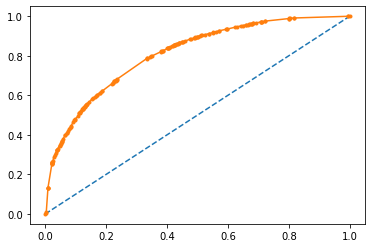

In [15]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Evaluation of both "Synergy" & "Counter" Feature 

In [43]:
X = hero_selection.merge(df_between_counter_rate['diff_counter'], left_index=True, right_index=True)
X = X.merge(df_between_hero_synergy.df_between_hero_synergy, left_index=True, right_index=True)
X

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter,df_between_hero_synergy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.033715,0.071145
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.002285,-0.856811
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.049158,-0.425840
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.005308,-0.501305
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.031996,-0.172906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.018388,-0.184601
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.029877,-0.141154
49997,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.066557,-0.614150
49998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.050295,-0.015386


In [44]:
scaler = StandardScaler()
scaler.fit(X)
X1=pd.DataFrame(scaler.transform(X),columns=X.columns)
X1.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus,diff_counter,df_between_hero_synergy
0,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.893963,0.119532
1,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,4.524206,-0.062968,-1.558533
2,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,-1.308931,-0.779188
3,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,-0.517351,-0.287529,-0.28145,-0.290373,-0.221033,0.138878,-0.915655
4,-0.186807,-0.331961,-0.269303,-0.319718,-0.219135,-0.162088,-0.100301,-0.114676,-0.175803,-0.268062,...,-0.103506,-0.139616,-0.163512,1.932924,-0.287529,-0.28145,-0.290373,4.524206,0.848292,-0.321797


In [45]:
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, random_state=seed)

C:\Users\chena\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X1, y, test_size=0.25, random_state=seed)
for i in range (221,229):
    print (f'Results when max number of leaf nodes = {i} and max depth = {i}')
    model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_leaf_nodes = i, max_depth = i)
    model_eval(model, X1, X_train, X_test, y_train, y_test)
    print ()

Results when max number of leaf nodes = 221 and max depth = 221
Accuracy -validation set: 74.34% (0.01)
Accuracy - test set: 74.90%
Precision: 0.734614
Recall: 0.810819
F1 score: 0.770838

Results when max number of leaf nodes = 222 and max depth = 222
Accuracy -validation set: 74.32% (0.01)
Accuracy - test set: 74.90%
Precision: 0.734614
Recall: 0.810819
F1 score: 0.770838

Results when max number of leaf nodes = 223 and max depth = 223
Accuracy -validation set: 74.32% (0.01)
Accuracy - test set: 74.90%
Precision: 0.734614
Recall: 0.810819
F1 score: 0.770838

Results when max number of leaf nodes = 224 and max depth = 224
Accuracy -validation set: 74.32% (0.01)
Accuracy - test set: 74.90%
Precision: 0.734614
Recall: 0.810819
F1 score: 0.770838

Results when max number of leaf nodes = 225 and max depth = 225
Accuracy -validation set: 74.33% (0.01)
Accuracy - test set: 74.93%
Precision: 0.734987
Recall: 0.810665
F1 score: 0.770973

Results when max number of leaf nodes = 226 and max dep

#### While adjusting max_leaf_nodes and max_depth, it was noted that as both parameters increased, the test accuracy increased as well for the Counter only feature and Counter and Synergy feature, however, it remained unchanged for Synergy only feature. The parameters were both set to 228 for optimal test accuracy, as any more would result in overfitting and any less would result in underfitting.

[Text(180.2978997564935, 213.816, 'X[222] <= 0.142\ngini = 0.499\nsamples = 37500\nvalue = [18064, 19436]'),
 Text(91.73181818181818, 206.56799999999998, 'X[223] <= -0.236\ngini = 0.476\nsamples = 20869\nvalue = [12738, 8131]'),
 Text(52.418181818181814, 199.32, 'X[222] <= -0.81\ngini = 0.368\nsamples = 9224\nvalue = [6986, 2238]'),
 Text(39.13246753246753, 192.072, 'X[4] <= 2.172\ngini = 0.253\nsamples = 3696\nvalue = [3148, 548]'),
 Text(31.885714285714286, 184.824, 'X[221] <= 2.152\ngini = 0.216\nsamples = 3525\nvalue = [3090, 435]'),
 Text(23.18961038961039, 177.576, 'X[168] <= 1.844\ngini = 0.188\nsamples = 3393\nvalue = [3036, 357]'),
 Text(17.392207792207792, 170.328, 'X[36] <= 3.808\ngini = 0.154\nsamples = 3179\nvalue = [2911, 268]'),
 Text(15.45974025974026, 163.07999999999998, 'X[50] <= 2.555\ngini = 0.143\nsamples = 3133\nvalue = [2890, 243]'),
 Text(11.594805194805195, 155.832, 'X[44] <= 3.041\ngini = 0.126\nsamples = 3036\nvalue = [2830, 206]'),
 Text(9.662337662337663, 1

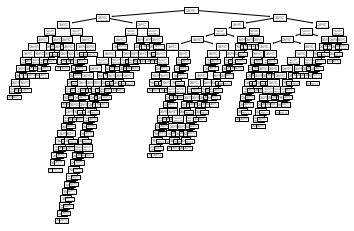

In [47]:
from sklearn.tree import plot_tree
model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_leaf_nodes = 228, max_depth = 228)
plot_tree(model.fit(X_train, y_train))

In [48]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 100)
model_eval(model, X1, X_train, X_test, y_train, y_test)

Accuracy -validation set: 71.07% (0.01)
Accuracy - test set: 71.03%
Precision: 0.718902
Recall: 0.728293
F1 score: 0.723567


### feature_importances_

In [53]:
vi = model.feature_importances_


# Create a pandas series(single columns data structure) with features importances for plotting.
#This makes it easy to visulaise when we have many features in the data
feat_importances = pd.Series(vi, index=X.columns)

# Sort
sorted_feat_importances = feat_importances.sort_values()

# Make a horizontal bar plot
# sorted_feat_importances.plot(kind='barh', color='blue')
sorted_feat_importances.tail(5)

radiant_Zeus               0.018757
radiant_Axe                0.019659
dire_Axe                   0.020864
df_between_hero_synergy    0.145343
diff_counter               0.176602
dtype: float64

#### we can observe that the ‘diff_counter’ feature has the highest impact in influencing the decision tree followed by the ‘synergy’ feature which is the ‘df_between_hero_synergy’ feature. The importance of the ‘counter’ feature corroborates the conclusion (that ‘counter’ is of greater importance than ‘synergy’) obtained when this and other models are evaluated using accuracy and other model performance metrics which is discussed further in Results.


AUC - Test Set: 70.95%


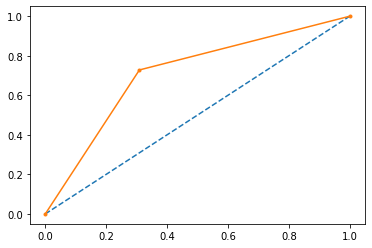

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [51]:
from sklearn.metrics import log_loss
accuracy = log_loss(y_test, predictions)
print("Logloss: %.2f" % (accuracy))

Logloss: 12.25
